<a href="https://colab.research.google.com/github/alihamzaaawan/Game_Prediction_BERT/blob/main/learner1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ktrain

In [ ]:
!git clone https://github.com/alihamzaaawan/Game_Prediction_BERT.git


Cloning into 'Game_Prediction_BERT'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
data_train = pd.read_excel('/content/Game_Prediction_BERT/train.xlsx',dtype= str)
data_train


,Plot,Review
0,"A Vietnam veteran, who has recently returned h...",neg
1,"John, an unattached plumber, meets and falls i...",neg
2,Play the action at your fingertips with 52 gam...,neg
3,You get a selection of four trucks and five st...,neg
4,"Just another mission, or so you thought, until...",neg
5,"Bruce Lee's relative, Chin, must save the worl...",neg
6,The first 3D Superman game. Your friends Lois ...,neg
7,"In Sonic Free Riders, full-motion body control...",neg
8,"After the destruction of Mother Base, survivin...",neg
9,You get to select your bus and drive it across...,neg


In [ ]:
data_test = pd.read_excel('/content/Game_Prediction_BERT/test.xlsx',dtype= str)
data_test


,Plot,Review
0,Set in a future in which almost the whole eart...,neg
1,Your life as a struggling journalist in Neo-SF...,neg
2,Ayano Aishi was a girl who was stumbling throu...,neg
3,four mini games in which players can control t...,neg
4,Bowser has kidnapped Princess Peach and has hi...,neg
5,"Fifa 20 features over 30 official leagues, 90 ...",neg
6,You assume the role of a psychopathic mass mur...,neg
7,"Charles Bishop Weyland, a wealthy industrialis...",neg
8,Bubsy the Bobcat returns once again to fight b...,neg
9,"In Gotham, one year after the defeat of Two-Fa...",neg


In [ ]:
(x_train, y_train), (x_test, y_test), preprocess = text.texts_from_df(train_df = data_train,
                                                                     text_column = 'Plot',
                                                                     label_columns = 'Review',
                                                                     val_df = data_test,
                                                                     maxlen = 400,
                                                                     preprocess_mode = 'bert')


['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
x_train[0].shape


(30, 400)

In [ ]:
model = text.text_classifier(name='bert',
                             train_data = (x_train, y_train),
                             preproc = preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data = (x_train, y_train),
                             val_data = (x_test, y_test),
                             batch_size = 6)

In [ ]:
learner1 = learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/ktrain/core.py:566: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  warnings.warn('max_epochs is being set to 5 since steps per epoch is small. ' +\


Epoch 1/5
5/5 [==============================] - 146s 25s/step - loss: 0.7866 - accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 126s 25s/step - loss: 0.6865 - accuracy: 0.5333
Epoch 3/5
5/5 [==============================] - 126s 25s/step - loss: 0.7485 - accuracy: 0.7333
Epoch 4/5
5/5 [==============================] - 126s 25s/step - loss: 5.9822 - accuracy: 0.4667
Epoch 5/5
5/5 [==============================] - 25s 465us/step - loss: 30.7185 - accuracy: 0.3333


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


In [ ]:
learner1

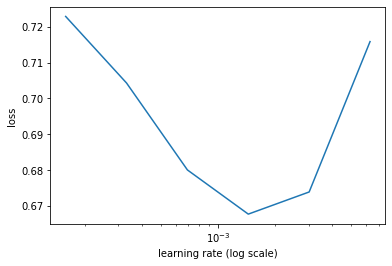

In [ ]:
learner.lr_plot()